In [15]:
import pandas as pd
import numpy as np
from numpy import exp, array, random, dot

In [16]:
data = pd.read_csv("mnist_train.csv")

In [17]:
2*np.random.random((3,1))-1

array([[ 0.52208579],
       [-0.71146695],
       [ 0.57806923]])

In [18]:
np.tanh(-3)

-0.9950547536867305

In [19]:
df = pd.read_csv("house.csv")
df.head(5)

,Bathrooms,Offers,Brick,Neighborhood,Bedrooms,SqFt,Price
0,2,2,No,East,2,1790,114300
1,2,3,No,East,4,2030,114200
2,2,1,No,East,3,1740,114800
3,2,3,No,East,3,1980,94700
4,3,3,No,East,3,2130,119800


In [20]:
# Create dummy variables

df_dummy = pd.get_dummies(df,drop_first=True)

In [21]:
x= df_dummy.drop(columns="Price")
y=df_dummy['Price']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
X_train.shape

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

2024-08-02 03:20:36.082323: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-02 03:20:36.115977: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-02 03:21:45.915526: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


In [26]:
# define model architecture
model = Sequential()
model.add(Input(shape=(7,)))
model.add(Dense(units=20,activation="relu",name="HiddenLayer_1")) # Hidden Layer
model.add(Dense(units=1,activation="relu",name="OutputLayer")) # Output Layer

model.compile(loss="mse",metrics=["mae"],optimizer="adam") # low value of mae is more perfect 

In [ ]:
model.optimizer()

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer_1 (Dense)       (None, 20)                160       
                                                                 
 OutputLayer (Dense)         (None, 1)                 21        
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file="model.png",show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [24]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [25]:
from  livelossplot import PlotLossesKerasTF

ModuleNotFoundError: No module named 'livelossplot'

In [26]:
#!pip install livelossplot

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [27]:
from livelossplot import PlotLossesKerasTF

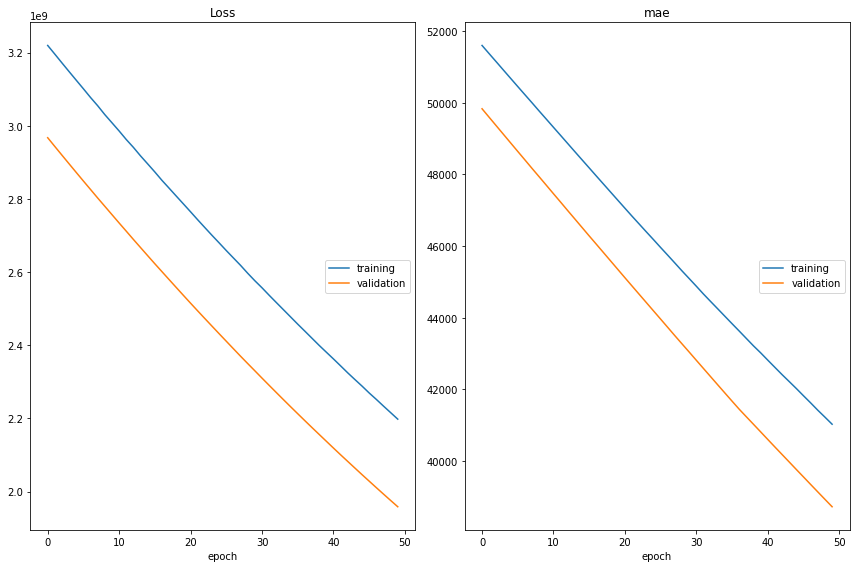

Loss
	training         	 (min: 2198172928.000, max: 3219281152.000, cur: 2198172928.000)
	validation       	 (min: 1958799232.000, max: 2967164928.000, cur: 1958799232.000)
mae
	training         	 (min: 41027.371, max: 51602.152, cur: 41027.371)
	validation       	 (min: 38723.141, max: 49834.590, cur: 38723.141)
3/3 [==============================] - 1s 263ms/step - loss: 2198172928.0000 - mae: 41027.3711 - val_loss: 1958799232.0000 - val_mae: 38723.1406


In [30]:
model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test),callbacks=[PlotLossesKerasTF()])

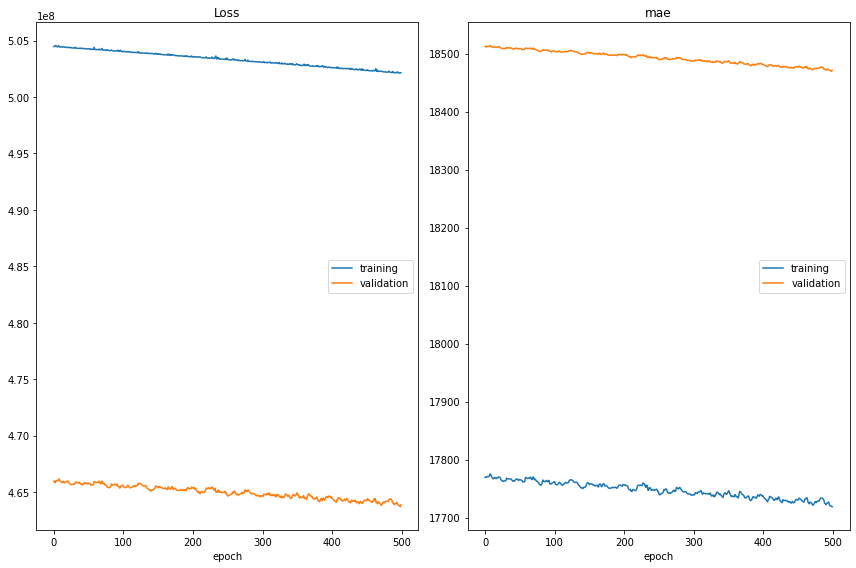

Loss
	training         	 (min: 502122720.000, max: 504574112.000, cur: 502152672.000)
	validation       	 (min: 463696128.000, max: 466156992.000, cur: 463864384.000)
mae
	training         	 (min: 17718.834, max: 17775.369, cur: 17718.834)
	validation       	 (min: 18469.652, max: 18514.100, cur: 18471.178)
3/3 [==============================] - 0s 221ms/step - loss: 502152672.0000 - mae: 17718.8340 - val_loss: 463864384.0000 - val_mae: 18471.1777


In [34]:
model.fit(X_train,y_train,epochs=500,batch_size=32,validation_data=(X_test,y_test),callbacks=[PlotLossesKerasTF()])

In [36]:
# x_train = x_train.values.astype(float)
# x_test = x_test.values.astype(float)
# occurs when the data being fed into model when data is incompatible datatype, int also convert to float will work
#import tensorflow.stf

In [38]:
model.evaluate(X_train,y_train)

3/3 [==============================] - 0s 7ms/step - loss: 502099968.0000 - mae: 17721.5527


[502099968.0, 17721.552734375]

In [39]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 22ms/step - loss: 463864384.0000 - mae: 18471.1777


[463864384.0, 18471.177734375]

In [40]:
import numpy as np
np.sqrt(502099968.0)

22407.587286452774

In [41]:
y_train

76     129800
43     154000
15     145800
93     157100
95     152500
        ...  
67     151900
64     130300
117    117800
47      90300
44     166500
Name: Price, Length: 96, dtype: int64

In [42]:
129800-22407.587286452774

107392.41271354722

In [43]:
# Multiclass classification


In [45]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [46]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.1


In [50]:
mnist = tf.keras.datasets.mnist

In [51]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [71]:
X_train.shape

(60000, 28, 28)

In [53]:
#normalize data
# pixel value take max of 255
# x - max(x) / max(x) - min(x) = x-0/255-0 = x/255.0
X_train,X_test = X_train/255.0,X_test/255.0

In [55]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy']) # accuracy for classification

In [ ]:
# Multi-classification problem and using categorical_crossentropy
#               Sam| App
#                1 | 0
#                0 | 1
#output |
#  Sam 0|
#  App 0|  

In [58]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [59]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [60]:
# train the model
from livelossplot import PlotLossesKerasTF

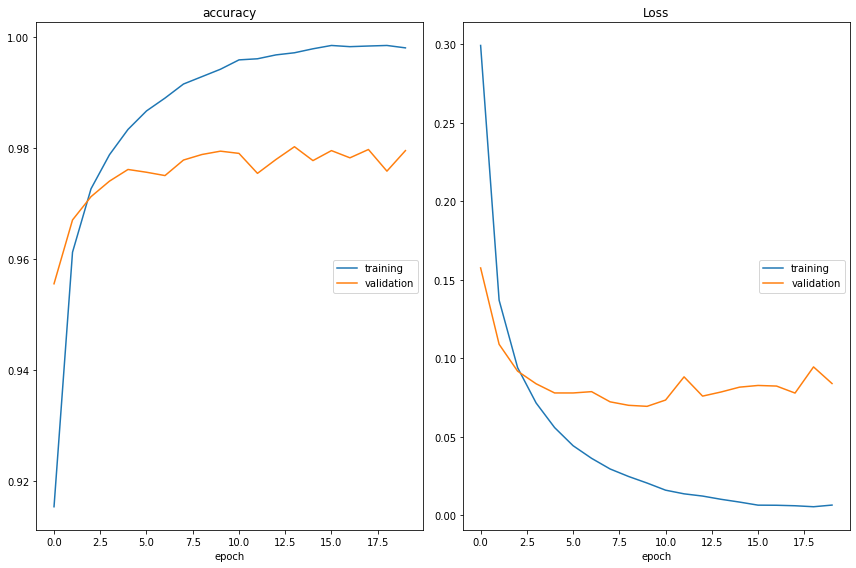

accuracy
	training         	 (min:    0.915, max:    0.999, cur:    0.998)
	validation       	 (min:    0.956, max:    0.980, cur:    0.980)
Loss
	training         	 (min:    0.005, max:    0.299, cur:    0.007)
	validation       	 (min:    0.069, max:    0.158, cur:    0.084)
938/938 [==============================] - 3s 3ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.0839 - val_accuracy: 0.9796


In [61]:
model.fit(X_train,y_train_encoded,epochs=20,batch_size=64,validation_data=(X_test,y_test_encoded),callbacks=[PlotLossesKerasTF()])

In [62]:
# Prediction
predictions = model.predict(X_train)
predictions

1875/1875 [==============================] - 2s 1ms/step


array([[1.47807466e-20, 8.94681032e-19, 3.31613102e-15, ...,
        2.52240844e-19, 6.74210619e-19, 1.24840493e-14],
       [1.00000000e+00, 5.86485149e-17, 2.46545842e-08, ...,
        8.89350118e-17, 2.13871828e-18, 1.51812243e-12],
       [1.35844731e-08, 3.43207830e-06, 1.02356289e-05, ...,
        2.15944127e-07, 7.02522666e-05, 1.16817225e-02],
       ...,
       [1.18163389e-20, 3.75776737e-17, 9.49494392e-22, ...,
        3.35614801e-20, 6.70985576e-12, 5.12092591e-11],
       [2.12283702e-09, 2.94744849e-12, 2.07577990e-08, ...,
        1.44021774e-14, 8.46071965e-13, 2.04676194e-15],
       [4.75139372e-10, 2.15500361e-14, 2.01941965e-08, ...,
        1.87520433e-11, 1.00000000e+00, 5.53427748e-10]], dtype=float32)

In [63]:
import pandas as pd
pd.DataFrame(predictions)

,0,1,2,3,4,5,6,7,8,9
0,1.478075e-20,8.946810e-19,3.316131e-15,4.322669e-06,4.249455e-33,9.999957e-01,1.805284e-21,2.522408e-19,6.742106e-19,1.248405e-14
1,1.000000e+00,5.864851e-17,2.465458e-08,2.195186e-14,1.628620e-20,1.738885e-18,5.321550e-15,8.893501e-17,2.138718e-18,1.518122e-12
2,1.358447e-08,3.432078e-06,1.023563e-05,1.665141e-08,9.882342e-01,2.328884e-09,2.739051e-08,2.159441e-07,7.025227e-05,1.168172e-02
3,1.239126e-12,9.999994e-01,1.924706e-07,1.666578e-11,1.180334e-08,7.575952e-13,2.934552e-11,2.350435e-07,1.118243e-07,1.391774e-12
4,3.914575e-17,6.416430e-11,2.250246e-14,5.771889e-09,1.753459e-07,2.776598e-12,7.911223e-16,2.755358e-08,4.711393e-08,9.999998e-01
...,...,...,...,...,...,...,...,...,...,...
59995,1.334296e-13,3.355747e-11,6.548939e-11,9.848025e-09,7.639306e-14,1.662961e-12,5.792551e-15,1.783259e-13,1.000000e+00,1.146738e-11
59996,2.150858e-16,5.414237e-15,7.430586e-14,9.998610e-01,1.740942e-23,3.640534e-10,6.513548e-23,9.402342e-20,9.168534e-06,1.297427e-04
59997,1.181634e-20,3.757767e-17,9.494944e-22,5.944693e-12,5.505017e-19,1.000000e+00,1.694580e-16,3.356148e-20,6.709856e-12,5.120926e-11
59998,2.122837e-09,2.947448e-12,2.075780e-08,4.319327e-13,2.487671e-10,1.266639e-10,1.000000e+00,1.440218e-14,8.460720e-13,2.046762e-15


In [64]:
predictions.argmax(axis=1)

array([5, 0, 4, ..., 5, 6, 8])

In [65]:
y_train_pred = predictions.argmax(axis=1)

In [66]:
pd.crosstab(y_train,y_train_pred)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,5919,0,0,0,0,0,0,0,1,3
1,0,6741,0,0,0,0,0,0,1,0
2,0,1,5954,0,0,0,0,0,1,2
3,1,1,3,6126,0,0,0,0,0,0
4,0,0,1,0,5758,0,0,0,1,82
5,0,0,0,0,0,5419,0,0,2,0
6,0,0,0,0,0,0,5918,0,0,0
7,1,1,0,0,0,0,0,6262,0,1
8,0,3,0,0,0,0,1,0,5846,1


In [68]:
predictions_test = model.predict(X_test)
y_test_pred = predictions_test.argmax(axis=1)
pd.crosstab(y_test,y_test_pred)

313/313 [==============================] - 0s 935us/step


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,969,1,0,1,1,0,3,1,3,1
1,0,1125,4,0,0,1,2,1,2,0
2,1,2,1013,2,2,0,2,3,6,1
3,0,0,6,984,0,7,1,2,6,4
4,0,0,4,0,946,0,5,2,0,25
5,2,0,0,6,2,869,4,2,6,1
6,2,3,1,1,3,3,941,0,4,0
7,1,4,8,0,0,0,0,1009,3,3
8,2,1,3,4,1,1,1,3,953,5


In [73]:
# if binary classification 
# define x and y
# split into train and test
# y has to be 0 or 1

# in Binary we dont need to encode 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential()
model.add(Input(Shape=(X_train.shape[1],)))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer="adma",metrics=['accuracy'])

# fit the model
model.fit(X_train,y_train,epochs=20,batch_size=64,validation_data=(X_test,y_test),callbacks=[PlotLossesKerasTF()])

ValueError: Please provide to Input a `shape` or a `tensor` or a `type_spec` argument. Note that `shape` does not include the batch dimension.

In [ ]:
# Home work on Titanic data